# Lab02 - Coding Exercise

In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt

from scipy.optimize import curve_fit

We use

## Postlab Q2 - Sensor Noise Analysis

Prior to starting this exercise, make sure to already have generated three `.txt` files containing 50 datapoints each (check the lab procedures again if you haven't done this yet). We assume that all data is stored in the same directory. </br>


*Plot* and *compare* the *average* and *standard deviation* when 1, 20, and 200 consecutive voltage values are averaged into a single data point. </br>
**Always label your axis and specify their units.**


Explain your observations and conclusions.

In [2]:
# Enter the path of folder where your .txt are stored
data_dir = r"./mP/"
voltage_data_files = ['voltage_data_1.txt', 'voltage_data_20.txt', 'voltage_data_200.txt']

vols = [np.loadtxt(data_dir+voltage_data_files[i], dtype="float") for i in range(3)]

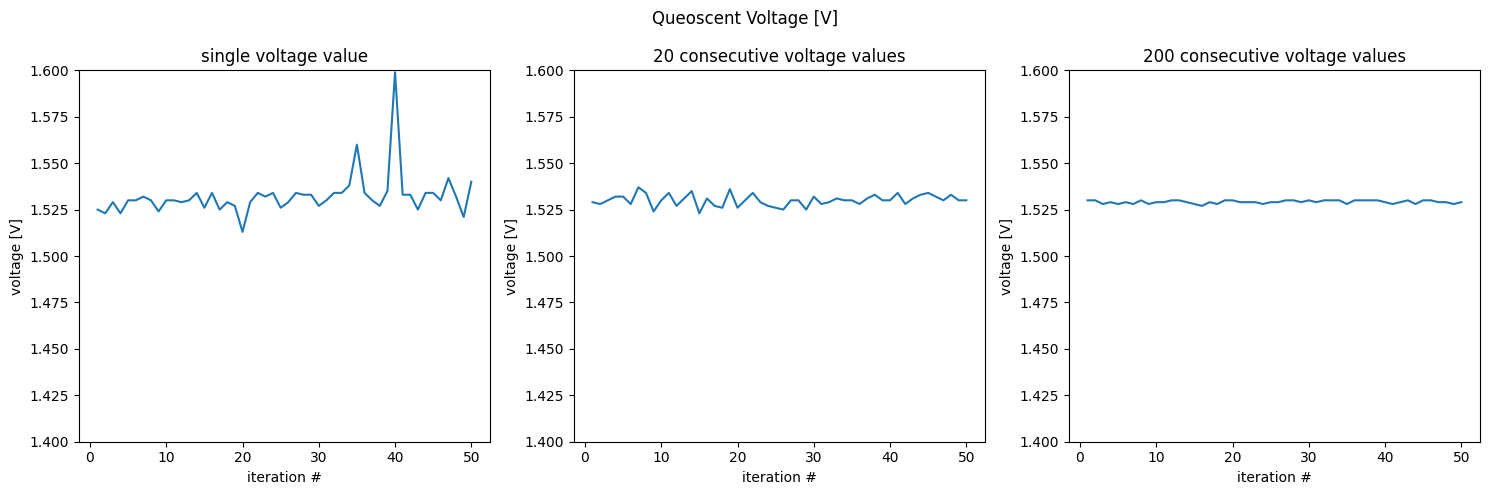

In [3]:
iters = [i+1 for i in range(50)]

fig, axs = plt.subplots(1, 3, figsize=(15,5), sharex=True)
fig.suptitle('Queoscent Voltage [V]')

axs[0].plot(iters, vols[0])
axs[0].set_title('single voltage value')
axs[0].set_xlabel('iteration #')
axs[0].set_ylabel('voltage [V]')
axs[0].set_ylim(1.4, 1.6)

axs[1].plot(iters, vols[1])
axs[1].set_title('20 consecutive voltage values')
axs[1].set_xlabel('iteration #')
axs[1].set_ylabel('voltage [V]')
axs[1].set_ylim(1.4, 1.6)

axs[2].plot(iters, vols[2])
axs[2].set_title('200 consecutive voltage values')
axs[2].set_xlabel('iteration #')
axs[2].set_ylabel('voltage [V]')
axs[2].set_ylim(1.4, 1.6)

fig.tight_layout()

In [4]:
means = [np.mean(vols[i]) for i in range(3)]
stds = [np.std(vols[i]) for i in range(3)]

for idx, i in enumerate([1, 20 , 200]):
    print("{0} consecutive values: mean={1}, std={2}".format(i, means[idx], stds[idx]))

1 consecutive values: mean=1.53218, std=0.011495546963933486
20 consecutive values: mean=1.53006, std=0.003068615322910324
200 consecutive values: mean=1.5291400000000002, std=0.0008248636250920645


### Explain your observations and conclusions. </br>
___________________________________________________

<font color=red> Answer here </font>

1 consecutive values: mean=1.53218, std=0.011495546963933486
20 consecutive values: mean=1.53006, std=0.003068615322910324
200 consecutive values: mean=1.5291400000000002, std=0.0008248636250920645

Looking at the graph, when we take more consecutive values to get average values, it becomes less vibrating.
We can observe it through the standard deviation value.
When we take larger samples for an average, standard deviation gets smaller.
But there is not a big difference between the mean values. 

By collecting the averaged value of large samples for a voltage sensor, we can get a more reliable number less influenced by noise.

___________________________________________________

## Postlab Q3 - Characterizing magnetic field decay of permanent magnet

As specified in the lab document, the magnetic field $B$ at a distance $z$ along the axis of symmetry of a cylindrical magnet is expressed as follows:

$$B(z) = \frac{B_r}{2} \left(\frac{D+z}{\sqrt{R^2+(D+z)^2}} - \frac{z}{\sqrt{R^2+z^2}}\right)$$

where $B_r$ is the remanence field at the surface of the magnet, D is the thickness of the magnet, and R is its radius.

First, plot the field vs distance and then use scipy's `curve_fit` function to fit a line to the measured values. </br>
While doing so, find the optimal $B_r$ that is used to fit the data.</br>
Bear in mind that the hall sensor saturates at a certain field value.</br>
Inspect whether this is the case by looking at the plot and disregard these values when fitting a curve to the data.</br>

You can save a figure using the command `plt.savefig(...)`

In [19]:
# Loading data from generated .txt file
data_dir = r'./mP'

field_path = os.path.join(data_dir, 'field_distance.txt')

data  = np.loadtxt(field_path, dtype="double", delimiter='-')

dist  = data[:, 0]
field = data[:, 1]

print(dist)
print(field)

[19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55.]
[23.115261 21.073748 19.811234 18.387539 16.775822 15.781928 14.653723
 13.498655 12.800241 11.672036 11.134795 10.167766 10.006591  9.066419
  8.341146  7.911353  7.212941  6.810009  6.595115  6.13846   5.735528
  5.413187  5.22515   4.768495  4.499876  4.365568  3.908912  3.935774
  3.452257  3.425395  3.425395  2.888155  2.80757   2.673256  2.619533
  2.592671  2.297191]


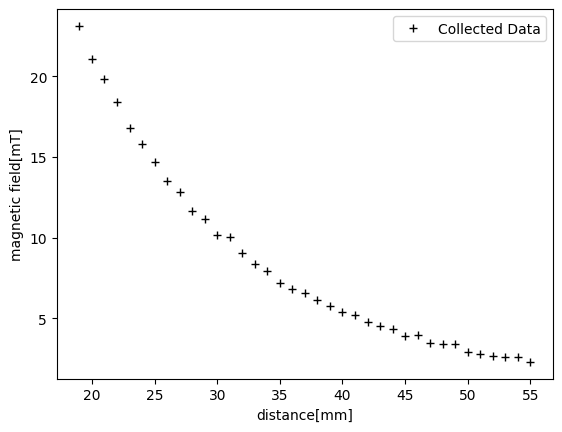

In [20]:
# first plotting the collected data to inspect for unusable data points (separate plot is optional)
plt.plot(dist, field, 'k+', label = 'Collected Data')
plt.legend()

# make sure that labels inßlude units
plt.xlabel('distance[mm]')
plt.ylabel('magnetic field[mT]')

plt.show()

Scipy's `curve_fit` uses a non-linear least squares method to fit a function to the given data. </br>
`curve_fit`, mainly, takes 3 mandatory arguments: the function `f` to fit, the `xdata` (the distance in our case), and the `ydata` (the measured field, for us).

The function `f` defines the shape of the curve we wish to fit and must take one independent variable as the first argument and the parameters to fit as the remaining arguments. In our case the function `f` should take as argument `f(z, B_r)`. </br>


The function can be called as `curve_fit(f, xdata, ydata)` and will return `popt`, the optimal value of the parameters to fit, and `pcov`, the estimated covariance of the fitted parameters, which is not relevant for us.

You can look at the scipy documentation if you want more details on how the function works: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [24]:
D = 10 # in mm
R = 20 # in mm

def func(z, B_r):
    # Define the function to fit, where B_r is the optimized parameter to be found and z is the xdata coordinate
    f = (D+z)/np.sqrt(R**2+(D+z)**2) - z/np.sqrt(R**2+z**2)
    return B_r/2 * f

[333.93134887] [[2.56871914]]


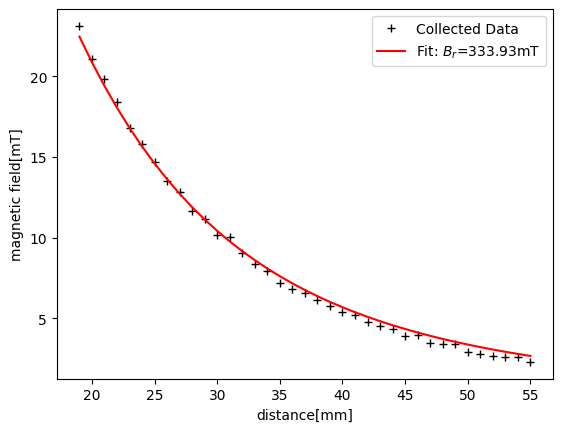

In [27]:
# Using scipy's curve_fit function to fit data using a non-linear least sqaures method
# provided function f(x, arg), the parameters provided after the first argument will be fit 

# curve_fit returns the optimal value of the parameter
popt, pcov = curve_fit(func, dist[:], field[:])

plt.plot(dist, field, 'k+', label = 'Collected Data')
plt.plot(dist, func(dist, *popt), 'r', label=f'Fit: $B_r$={popt[0]:.2f}mT')
plt.legend()

# make sure that labels include units
plt.xlabel('distance[mm]')
plt.ylabel('magnetic field[mT]')

print(popt, pcov)